In [1]:
%load_ext autoreload
%autoreload 2

In [5]:
import head
import numpy as np
import matplotlib.pyplot as plt
import pdb
import warnings
warnings.filterwarnings("ignore")

In [31]:
# create a search space
# we create it using sqrt(L) and L/D by following this paper: 
# https://pubs.acs.org/action/showCitFormats?doi=10.1021/acs.jpcc.0c10680&ref=pdf

NUM = 10

c1 = np.linspace(0,1,num=NUM)
c2 = np.linspace(0,1,num=NUM)
c3 = np.linspace(0,1,num=NUM)

hplane = head.Hyperplane(c1,c2,c3)

X = np.linspace(1,2, num=NUM) # sqrt(L)
Y = np.linspace(1,2, num=NUM) # l/D
grid = head.Euclidean(X,Y)

grid_samples = grid.sample(n_samples=len(hplane))

spectra = {}
for i,pi in enumerate(grid_samples):
    L = pi[0]**2
    R = 0.5*(L/pi[1])
    s = head.get_spectrum(L,R)
    spectra[i]= s.fd.data_matrix.squeeze()
spectra['wav'] = s.fd.grid_points[0]
df = pd.DataFrame.from_dict(spectra)

In [34]:
import pandas as pd


,0,wav
0,0.811053,400.000000
1,0.790198,412.244898
2,0.773873,424.489796
3,0.771616,436.734694
4,0.782198,448.979592
5,0.799768,461.224490
6,0.829843,473.469388
7,0.909717,485.714286
8,0.995813,497.959184
9,1.000000,510.204082


In [7]:
# define multiple loss functions

def oracle(query, st, measure):
    pi = get_length_radius(query)
    si = head.get_spectrum(pi[0],pi[1])
    yi = measure(si, st)

    return yi

In [8]:
# define a model for the loss function we would like to optimize
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern

kernel = 1.0 * Matern(length_scale=0.2, nu=1.5)
model = GaussianProcessRegressor(kernel=kernel)

In [9]:
query_strategy = head.thomspon_sampling

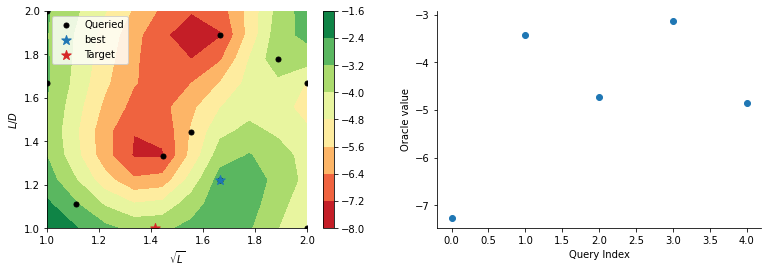

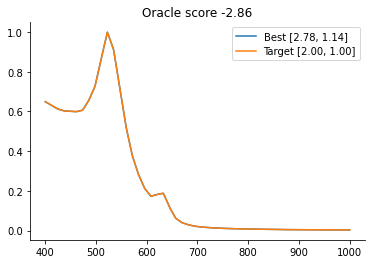

In [19]:
design = head.ExampleRunnerSimulation(grid)
for measure in [func_norm, euclidean_dist]:
    # initiate using 5 samples and then do a batch sampling for 5 times with a batch size of 5
    #design.run(lambda x,st: oracle(x,st, measure), n_queries=5, n_init=5)
    design.iterate(model,query_strategy,measure,
                  n_iter=1, n_init=5, b=5)
    design.plot_learning()
    design.plot_bestmatch()
    break